In [1]:
import pandas as pd
import numpy as np

/opt/homebrew/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/m7/km4y3psx5lj896_fn61c9y4r0000gn/T/ipykernel_76500/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# load files
assessments = pd.read_csv('/Users/nicolaswilhelm//kaggle/input/open-university-learning-analytics-dataset/assessments.csv')
courses = pd.read_csv('/Users/nicolaswilhelm//kaggle/input/open-university-learning-analytics-dataset/courses.csv')
student_assessments = pd.read_csv('/Users/nicolaswilhelm//kaggle/input/open-university-learning-analytics-dataset/studentAssessment.csv')
student_vle= pd.read_csv('/Users/nicolaswilhelm//kaggle/input/open-university-learning-analytics-dataset/studentVle.csv')
vle = pd.read_csv('/Users/nicolaswilhelm//kaggle/input/open-university-learning-analytics-dataset/vle.csv')
student_info = pd.read_csv('/Users/nicolaswilhelm//kaggle/input/open-university-learning-analytics-dataset/studentInfo.csv')

# VLE Preprocessing and Analysis

In [3]:
# each resource is identified by a unique id_site
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [4]:
vle.isna().value_counts()

id_site  code_module  code_presentation  activity_type  week_from  week_to
False    False        False              False          True       True       5243
                                                        False      False      1121
Name: count, dtype: int64

In [5]:
# from the above, we can see that week_from and week_to are missing values
# for our anaylsis, the weeks  and end dates are not important, so we can drop those columns
vle = vle.drop(columns=["week_from", "week_to"])

<Axes: title={'center': '# of resources per course session'}, xlabel='Course Session (Module, Presentation)', ylabel='Frequency'>

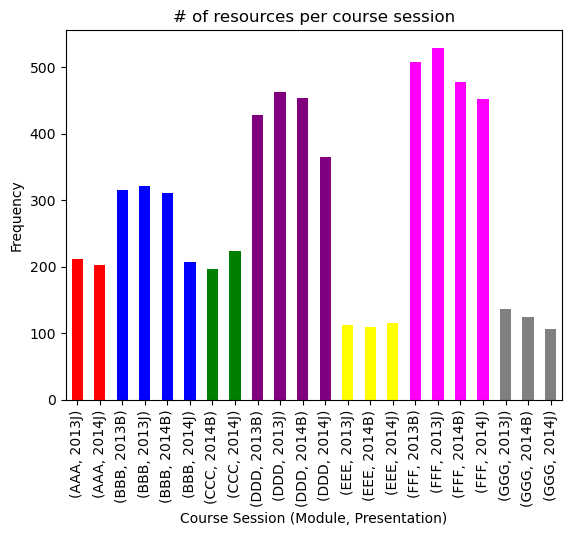

In [6]:
# this data is categorical and so we can examine the value counts for relevant columns
# first, let's see how many resources each code_module and code_presentation has
# this will also let us see if different versions (i.e. different code_presentations) of the same code_module have different number of resources
df = vle.groupby(['code_module','code_presentation'])["activity_type"].size()
colour_map = {"AAA": "red", "BBB": "blue", "CCC": "green", "DDD": "purple", "EEE": "yellow", "FFF": "magenta", "GGG": "grey"}
df.plot(kind="bar", 
    color=[colour_map[x[0]] for x in df.index],
    title='# of resources per course session',
    xlabel='Course Session (Module, Presentation)',
    ylabel='Frequency'
    )

<Axes: title={'center': 'Types of Resources'}, xlabel='Resource Type', ylabel='Frequency'>

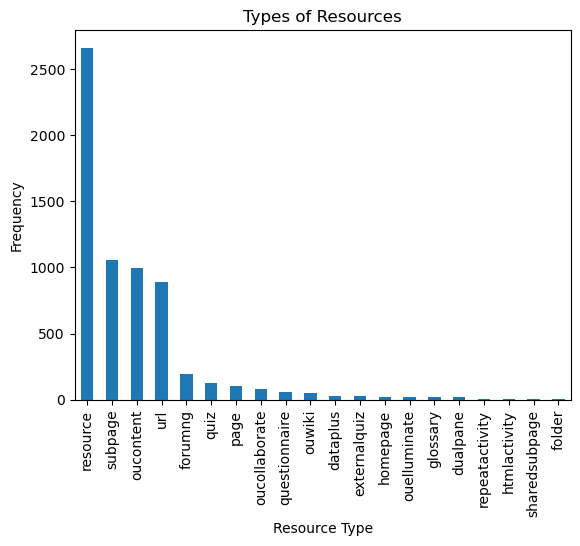

In [7]:
# what types of resources are avaliable? 
# certain resources may be more effective so this is valuable to know
vle["activity_type"].value_counts().plot(
    kind="bar",
    title='Types of Resources',
    xlabel="Resource Type",
    ylabel='Frequency'
    )

# StudentVLE Preprocessing and Analysis

In [8]:
student_vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [9]:
# student_vle has no missing values
student_vle.isna().value_counts()

code_module  code_presentation  id_student  id_site  date   sum_click
False        False              False       False    False  False        10655280
Name: count, dtype: int64

<Axes: title={'center': 'How many interactions do different resources have?'}, xlabel='Bins', ylabel='Frequency'>

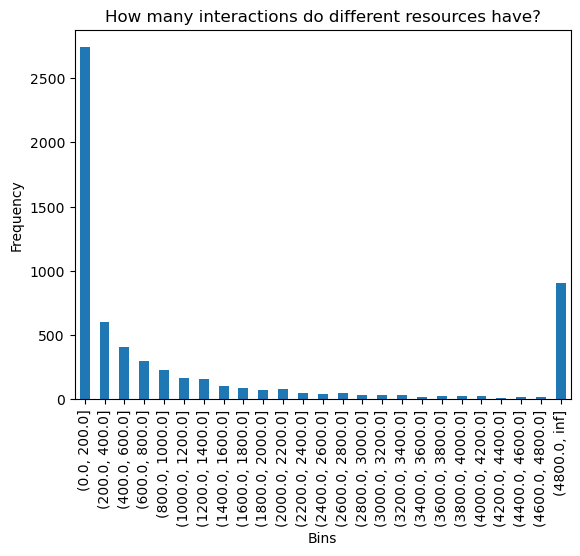

In [10]:
# plot number of clicks per resource distribution
df = student_vle.groupby(['id_site'])['sum_click'].sum().reset_index()
bins = [x for x in range(0, 5000, 200)] + [np.inf]
pd.cut(df["sum_click"], bins).value_counts().sort_index().plot(
    kind="bar",
    title='How many interactions do different resources have?',
    xlabel='Bins',
    ylabel='Frequency'
)


<Axes: title={'center': 'How many interactions do different resources have?'}, ylabel='Frequency'>

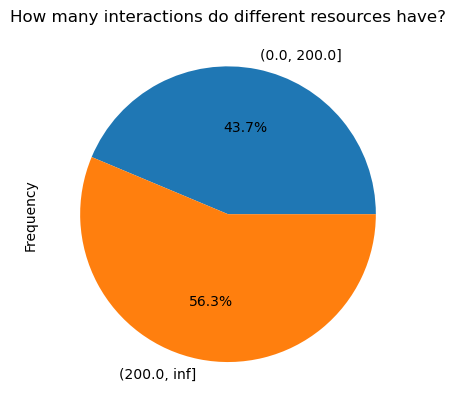

In [11]:
bins = [0, 200, np.inf]
pd.cut(df["sum_click"], bins).value_counts().sort_index().plot(
    kind="pie",
    title='How many interactions do different resources have?',
    xlabel='Bins (# of interactions)',
    ylabel='Frequency',
    autopct='%1.1f%%'
)

<Axes: title={'center': 'When are resources typically accessed?'}, xlabel='Date Range Accessed', ylabel='Frequency'>

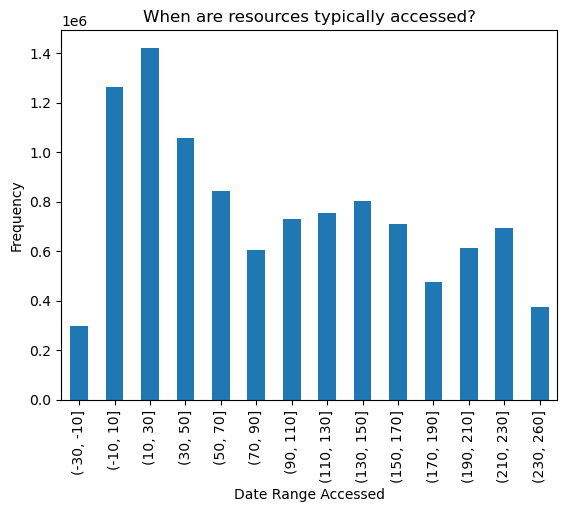

In [12]:
# plot date accessed per resource
bins = [-30, -10, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 260]
pd.cut(student_vle["date"], bins).value_counts().sort_index().plot(
    kind="bar",title="When are resources typically accessed?",
    xlabel='Date Range Accessed',ylabel='Frequency'
)

<Axes: title={'center': 'Distribution of sum_click across id_student'}, xlabel='Range of Interactions Per Student Per Module', ylabel='Frequency'>

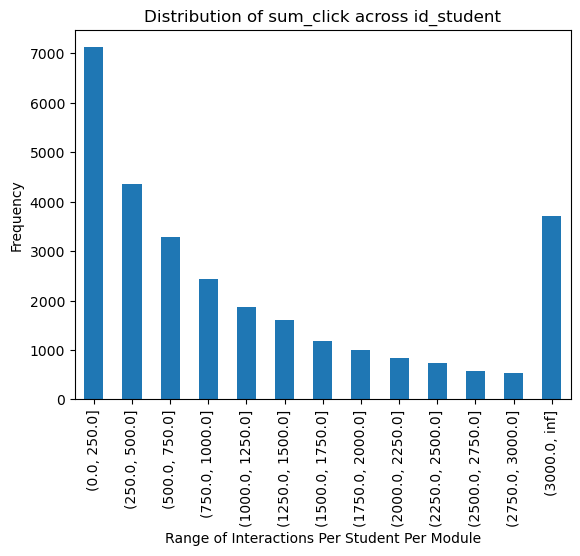

In [13]:
# get clicks per student per module
df = student_vle.groupby(['id_student', 'code_module','code_presentation'])['sum_click'].sum().reset_index()

bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, np.inf]
pd.cut(df['sum_click'], bins).value_counts().sort_index().plot.bar(
    title='Distribution of sum_click across id_student',
    xlabel='Range of Interactions Per Student Per Module',
    ylabel='Frequency'
)

0.4082630206698104
0.2662240108652857


<Axes: title={'center': 'Final Score vs Clicks'}, xlabel='sum_click', ylabel='score'>

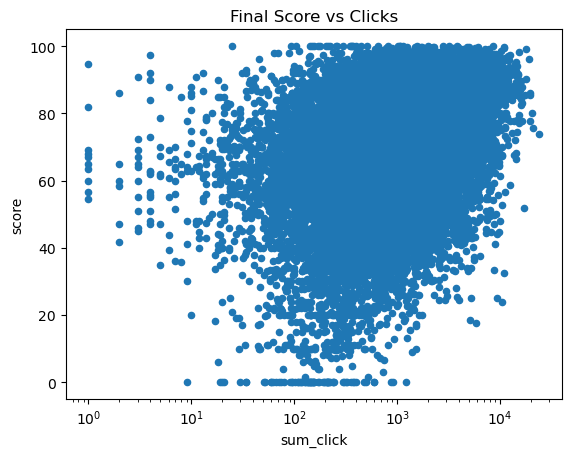

In [14]:
# code from Peter
merged = pd.merge(student_assessments, assessments, on='id_assessment')
merged['weighted_score'] = merged['score'] * merged['weight']
grouped = merged.groupby(['id_student', 'code_module', 'code_presentation']).agg({'weighted_score': 'sum', 'weight': 'sum'}).reset_index()
grouped['score'] = grouped['weighted_score'] / grouped['weight']
student_scores = grouped[['id_student', 'code_module', 'code_presentation', 'score']]
# end of code from Peter
clicks_per_student_per_module = student_vle.groupby(['id_student', 'code_module','code_presentation'])['sum_click'].sum().reset_index()
clicks_and_final_result = pd.merge(clicks_per_student_per_module, student_info, on=['id_student', 'code_module','code_presentation'], how='left')
grade_mapping = {"Distinction": 4, "Pass": 2, "Withdrawn": 1, "Fail": 0}
clicks_and_final_result["final_result_numeric"] = clicks_and_final_result["final_result"].apply(lambda x: grade_mapping[x])
clicks_and_final_result["final_result_numeric"].corr(clicks_and_final_result["sum_click"])
results_and_interactions_per_student_per_module = pd.merge(clicks_and_final_result[["id_student", "code_module", "code_presentation", "final_result_numeric", "sum_click"]], student_scores, on=['id_student', 'code_module','code_presentation'], how='left')

# Do students with higher interaction tend to do better? Yes!
print(results_and_interactions_per_student_per_module["final_result_numeric"].corr(results_and_interactions_per_student_per_module["sum_click"], method='kendall'))
print(results_and_interactions_per_student_per_module["score"].corr(results_and_interactions_per_student_per_module["sum_click"], method='kendall'))

results_and_interactions_per_student_per_module.plot.scatter(x='sum_click', y='score',title='Final Score vs Clicks', logx=True)

<Axes: xlabel='sum_click', ylabel='score'>

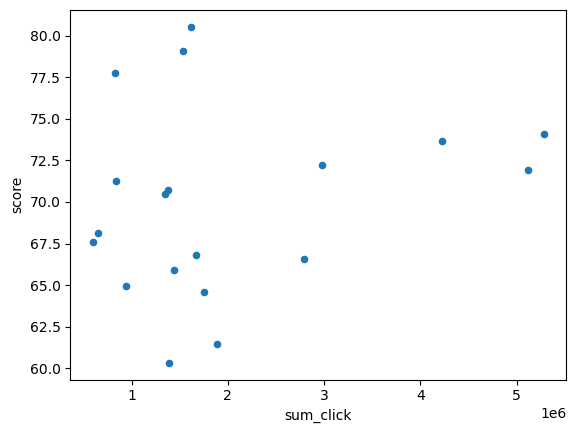

In [15]:
# mean score for a module vs total module interaction
mean_score_and_total_sum_click = results_and_interactions_per_student_per_module.groupby(['code_module', 'code_presentation']).agg(
    {'score': 'mean', 'sum_click': 'sum'}
    ).reset_index()
mean_score_and_total_sum_click.plot(x='sum_click', y='score', kind='scatter')

In [16]:
# mean score vs resource type distribution for module
resource_type_distribution_per_module = vle.groupby(["code_module", "code_presentation"])["activity_type"].value_counts().unstack(fill_value=0)
resource_type_distribution_per_module_with_interaction_and_score = pd.merge(resource_type_distribution_per_module, mean_score_and_total_sum_click, on=['code_module', 'code_presentation'])

<Axes: title={'center': 'Activity and Score Correlation'}, xlabel='activity_type'>

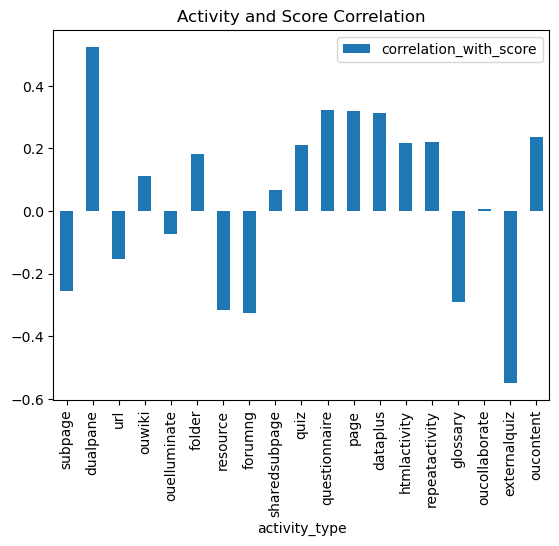

In [17]:
# is there a correlation between the score and the frequency of specific types of resources?
# this may just point to the fact that more complex courses have lower grades (e.g. lots of external quizzes lead to lower grades)
df = pd.DataFrame(columns=["activity_type", "correlation_with_score"])
correlations = []
activities = []
for activity in set(vle["activity_type"]):
    if activity != "homepage": #homepage is na so we exclude it
        correlation = resource_type_distribution_per_module_with_interaction_and_score[activity].corr(
            resource_type_distribution_per_module_with_interaction_and_score["score"], method='kendall'
        )
        correlations.append(correlation)
        activities.append(activity)
df["activity_type"] = activities
df["correlation_with_score"] = correlations
df.plot(x='activity_type', y='correlation_with_score', kind='bar',  title="Activity and Score Correlation")

<Axes: title={'center': 'Activity and Interaction Correlation'}, xlabel='activity_type'>

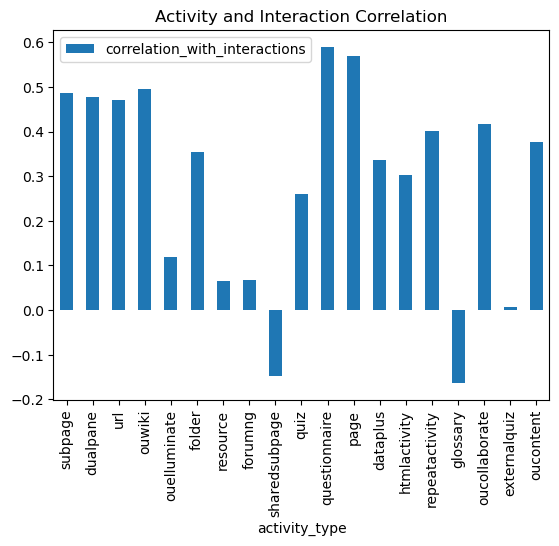

In [18]:
# is there a correlation between the total interactions in the module and the frequency of specific types of resources?
df = pd.DataFrame(columns=["activity_type", "correlation_with_interactions"])
correlations = []
activities = []
for activity in set(vle["activity_type"]):
    if activity != "homepage":
        correlation = resource_type_distribution_per_module_with_interaction_and_score[activity].corr(
            resource_type_distribution_per_module_with_interaction_and_score["sum_click"], method='kendall'
        )
        correlations.append(correlation)
        activities.append(activity)
df["activity_type"] = activities
df["correlation_with_interactions"] = correlations
df.plot(x='activity_type', y='correlation_with_interactions', kind='bar', title="Activity and Interaction Correlation")
